In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from config import data_processed_dir
from os.path import join
import folium

In [2]:
porto_traffic = pd.read_csv(join(data_processed_dir, 'traffic_flow_clean.csv'))

In [3]:
porto_traffic.columns

Index(['dateFrom', 'dateTo', 'processed_id', 'longitude', 'latitude',
       'intensity', 'ocupancy'],
      dtype='object')

In [4]:

# Get the road network for Porto from OpenStreetMap
place_name = "Porto, Portugal"
graph = ox.graph_from_place(place_name, network_type='all')

# Create a GeoDataFrame from the graph edges
gdf = ox.graph_to_gdfs(graph, nodes=False, edges=True)

# Plot the road network
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, linewidth=0.5, color='black', alpha=0.5)  # Plot the streets

# Plot the heatmap for traffic occupancy
sc = ax.scatter(
    porto_traffic['longitude'],
    porto_traffic['latitude'],
    c=porto_traffic['ocupancy'],
    cmap='Greens',
    s=100,  # Adjust the size of the points
    edgecolor='black',
    alpha=0.8,  # Adjust the transparency
    label='Traffic Occupancy'
)

# Add a colorbar with adjusted size
cbar = plt.colorbar(sc, label='Traffic Occupancy', pad=0.02, shrink=0.6)

# Show the plot
plt.title('Traffic Occupancy Heatmap on Porto Road Network')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Adjust layout to fit the colorbar properly
plt.tight_layout()

plt.show()

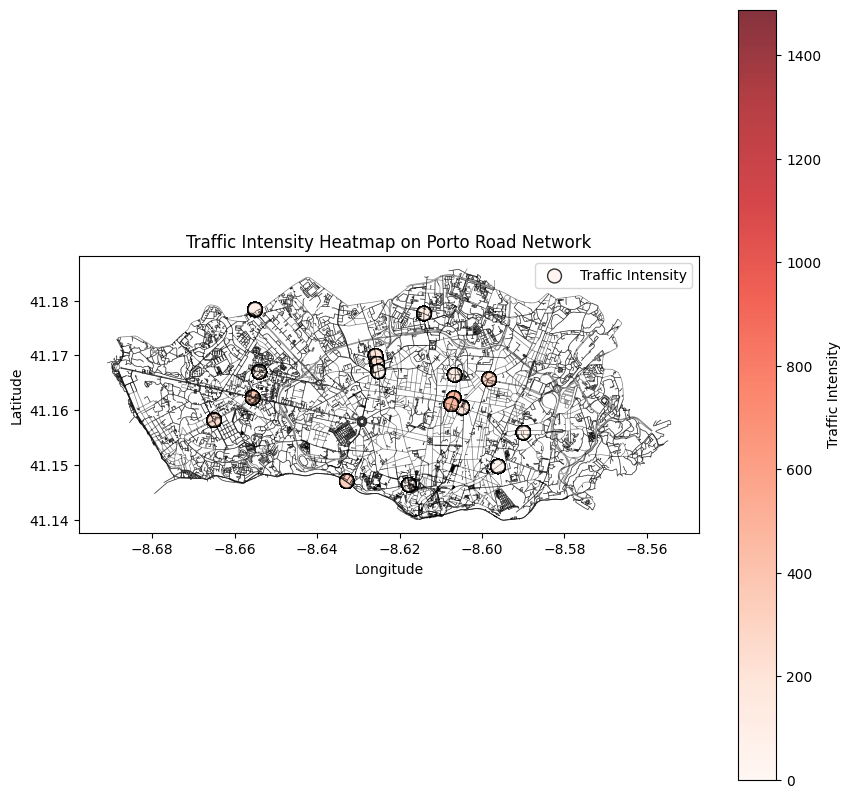

In [ ]:

# Get the road network for Porto from OpenStreetMap
place_name = "Porto, Portugal"
graph = ox.graph_from_place(place_name, network_type='all')

# Create a GeoDataFrame from the graph edges
gdf = ox.graph_to_gdfs(graph, nodes=False, edges=True)

# Plot the road network
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, linewidth=0.5, color='black', alpha=0.5)  # Plot the streets

# Plot the heatmap for traffic occupancy
sc = ax.scatter(
    porto_traffic['longitude'],
    porto_traffic['latitude'],
    c=porto_traffic['intensity'],
    cmap='Reds',
    s=100,  # Adjust the size of the points
    edgecolor='black',
    alpha=0.8,  # Adjust the transparency
    label='Traffic Intensity'
)

# Add a colorbar with adjusted size
cbar = plt.colorbar(sc, label='Traffic Intensity', pad=0.02, shrink=0.6)

# Show the plot
plt.title('Traffic Occupancy Heatmap on Porto Road Network')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Adjust layout to fit the colorbar properly
plt.tight_layout()

plt.show()